Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Turnover By Staff Category & Staff Group

In [2]:
data = pd.read_excel("Turnover by Care Group.xlsx")
data

,Turnover By Service & Care Group,2020,2021,2022
0,National Ambulance Service,0.081514,0.049988,0.120089
1,Acute Hospital Services,0.075404,0.082219,0.104690
2,Community Health & Wellbeing,0.026258,0.077687,0.105345
3,Mental Health,0.045101,0.057828,0.092594
4,Primary Care,0.058211,0.094425,0.130316
5,Disabilities,0.060312,0.073914,0.092293
6,Older People,0.066418,0.056647,0.080474
7,National Services & Central Functions,0.055270,0.084846,0.103257


In [3]:
data[2020] = data[2020]*100
data[2021] = data[2021]*100
data[2022] = data[2022]*100

In [4]:
data.head()

,Turnover By Service & Care Group,2020,2021,2022
0,National Ambulance Service,8.151431,4.998810,12.008948
1,Acute Hospital Services,7.540409,8.221941,10.468962
2,Community Health & Wellbeing,2.625821,7.768666,10.534469
3,Mental Health,4.510085,5.782769,9.259433
4,Primary Care,5.821140,9.442464,13.031567


In [5]:
data.describe()

,2020,2021,2022
count,8.000000,8.000000,8.000000
mean,5.856106,7.219416,10.363228
std,1.736555,1.571683,1.591825
min,2.625821,4.998810,8.047425
25%,5.272776,5.753240,9.251910
50%,5.926161,7.580037,10.397319
75%,6.866433,8.287609,10.903089
max,8.151431,9.442464,13.031567


In [6]:
# Calculate average turnover by staff category
data['Average Turnover'] = data[[2020, 2021, 2022]].mean(axis=1)

In [7]:
data.head()

,Turnover By Service & Care Group,2020,2021,2022,Average Turnover
0,National Ambulance Service,8.151431,4.998810,12.008948,8.386396
1,Acute Hospital Services,7.540409,8.221941,10.468962,8.743771
2,Community Health & Wellbeing,2.625821,7.768666,10.534469,6.976319
3,Mental Health,4.510085,5.782769,9.259433,6.517429
4,Primary Care,5.821140,9.442464,13.031567,9.431723


In [8]:
data = data.sort_values(by='Average Turnover', ascending=False)

Average Turnover

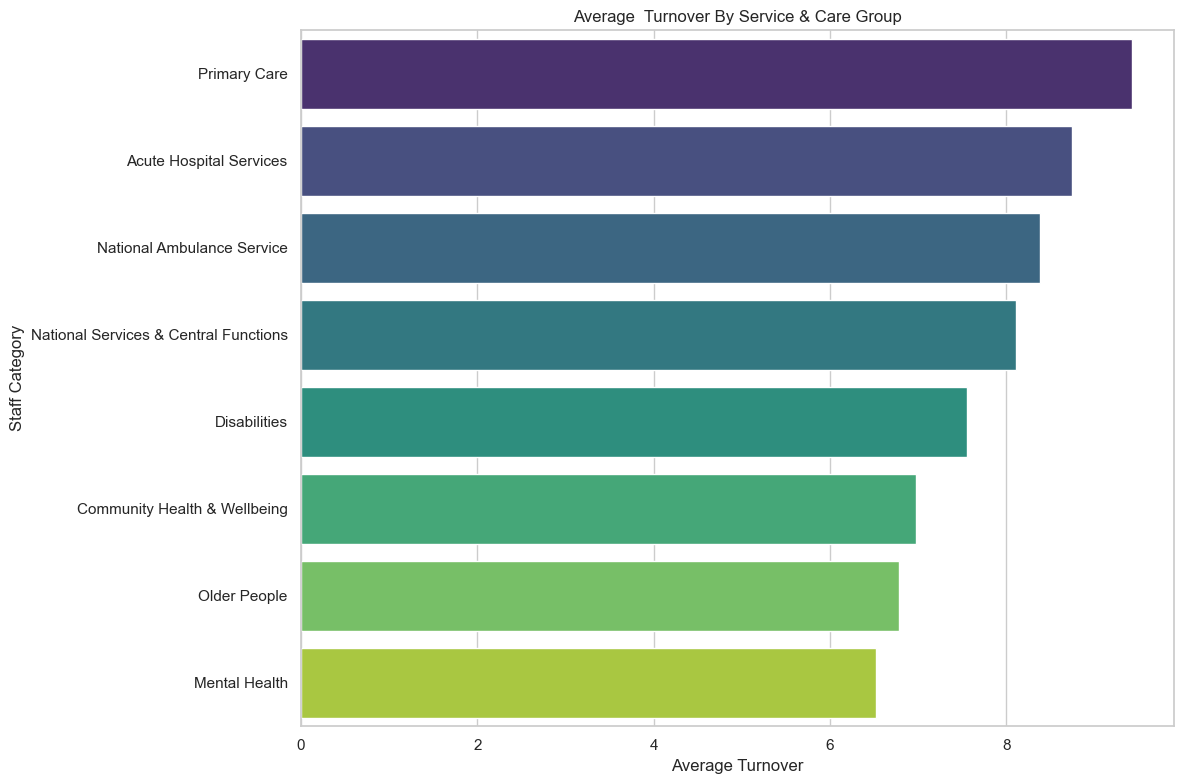

In [9]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Bar plot for average turnover by staff category
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Turnover', y=' Turnover By Service & Care Group', data=data, palette='viridis')
plt.xlabel('Average Turnover')
plt.ylabel('Staff Category')
plt.title('Average  Turnover By Service & Care Group')
plt.tight_layout()
plt.show()

Turnover trends by staff category over the years

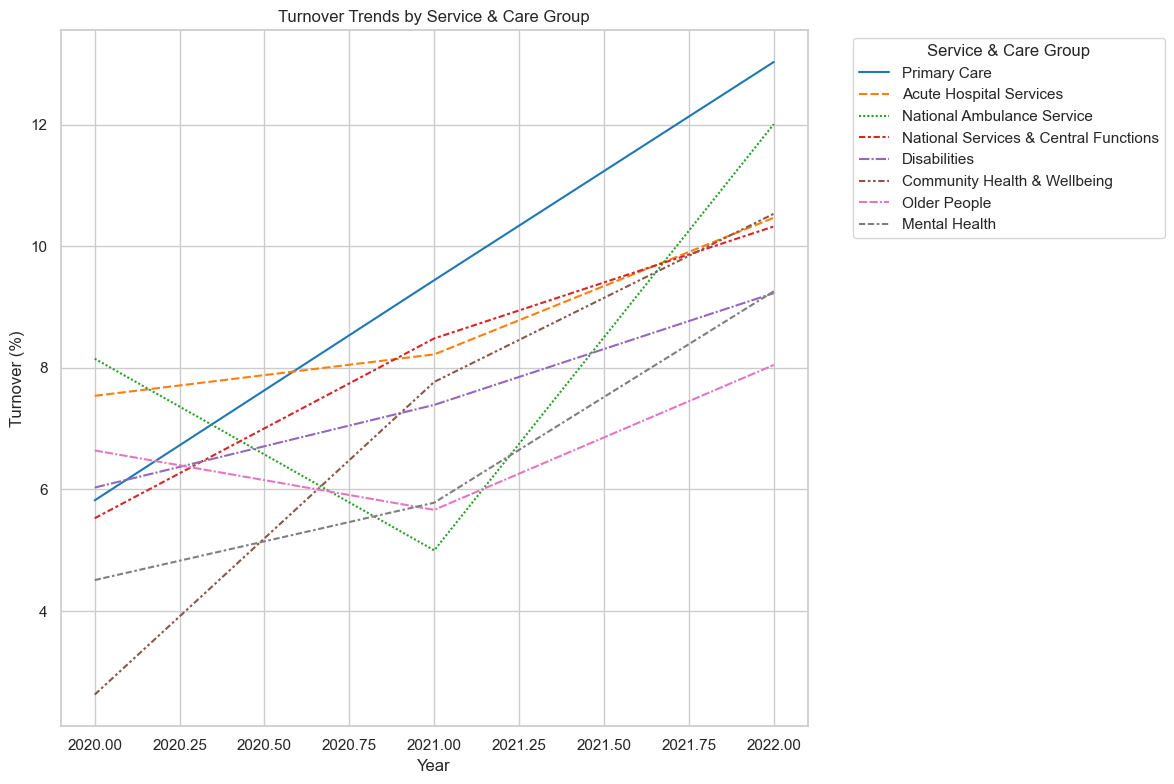

In [10]:
# Visualization 2: Line plot for turnover trends by staff category over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=data.drop('Average Turnover', axis=1).set_index(' Turnover By Service & Care Group').T, palette='tab10')
plt.xlabel('Year')
plt.ylabel('Turnover (%)')
plt.title('Turnover Trends by Service & Care Group')
plt.legend(title='Service & Care Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Compare turnover distributions for each year

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


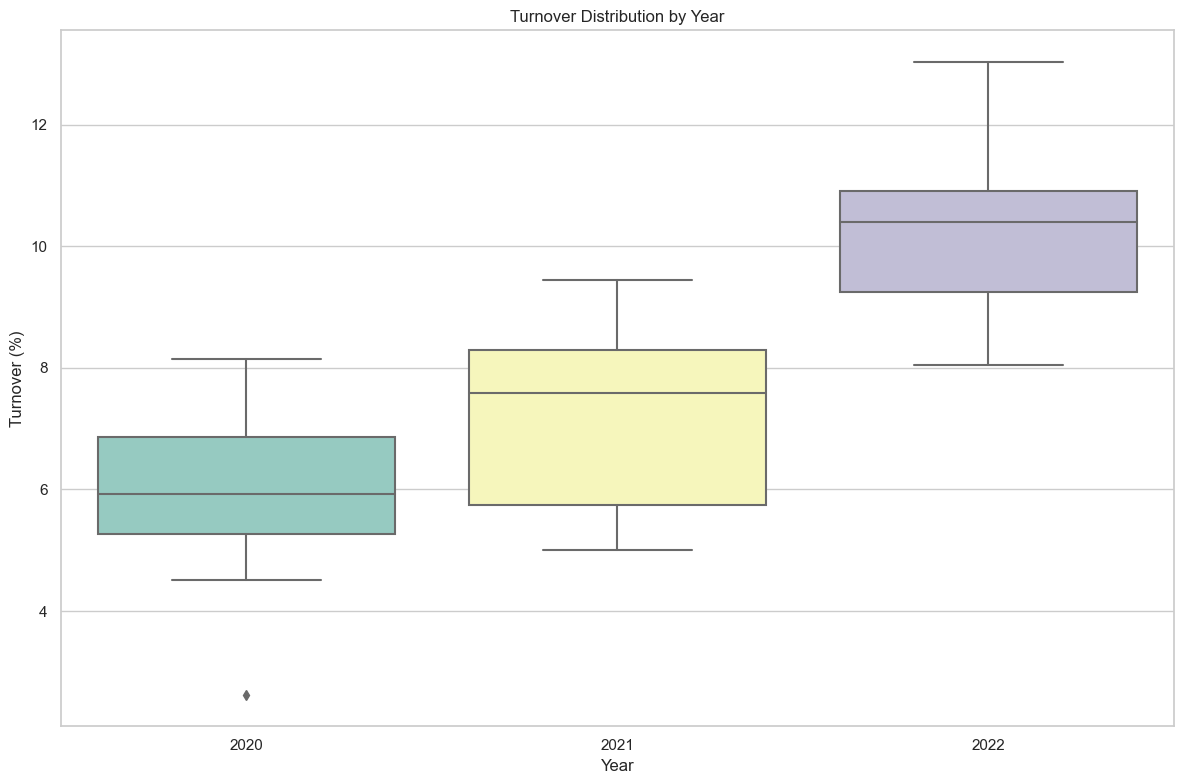

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Average Turnover', axis=1), palette='Set3')
plt.xlabel('Year')
plt.ylabel('Turnover (%)')
plt.title('Turnover Distribution by Year')
plt.tight_layout()
plt.show()

correlation matrix for turnover rates across years

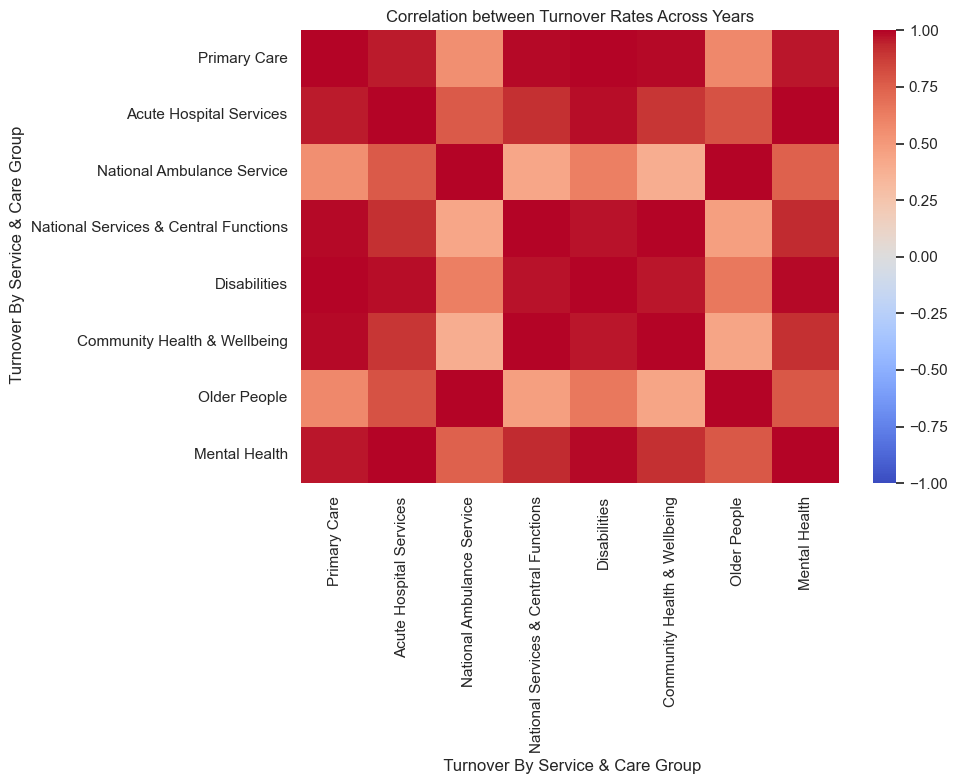

In [12]:
# Calculate the correlation matrix for turnover rates across years
correlation_matrix = data.drop(['Average Turnover'], axis=1).set_index(' Turnover By Service & Care Group').T.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Turnover Rates Across Years')
plt.tight_layout()
plt.show()